<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/10_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10章 アンサンブル学習

アンサンブル学習で識別を行います。

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

breast_cancerデータを読み込んでX, yに格納後、概要を表示します。

In [2]:
bc = load_breast_cancer()
X = bc.data
y = bc.target
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

主成分分析を行い、その結果を表示します。

[0.98204467 0.01617649]


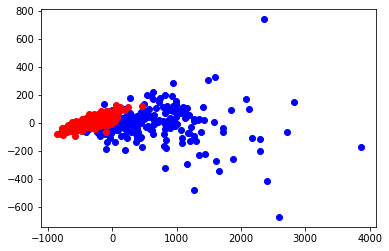

In [3]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) 
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1], 'bo')
plt.plot(X2[y==1,0], X2[y==1,1], 'ro')

## バギング

base_estimator引数で識別器を指定します。Noneの場合は決定木になります。

In [4]:
clf1 = ensemble.BaggingClassifier()
clf1.fit(X, y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

交差確認法で評価します。

In [5]:
scores = cross_val_score(clf1, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

94.56 +/- 5.30 %


## ランダムフォレスト

In [6]:
clf2 = ensemble.RandomForestClassifier(n_estimators=10)
clf2.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

交差確認法で評価します。

In [7]:
scores = cross_val_score(clf2, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

95.26 +/- 4.71 %


## Adaブースト

In [8]:
clf3 = ensemble.AdaBoostClassifier()
clf3.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

交差確認法で評価します。

In [9]:
scores = cross_val_score(clf3, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

96.13 +/- 5.62 %


## 勾配ブースティング

In [10]:
clf4 = ensemble.GradientBoostingClassifier()
clf4.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

交差確認法で評価します。

In [11]:
scores = cross_val_score(clf4, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() *200))

96.32 +/- 5.07 %


### 補足

各特徴の重要性を確認するコード

Feature ranking:
1. worst radius (0.440364)
2. worst perimeter (0.152237)
3. worst concave points (0.127359)
4. mean concave points (0.125616)
5. worst texture (0.046023)
6. worst area (0.029448)
7. mean texture (0.017874)
8. worst concavity (0.012867)
9. area error (0.008465)
10. compactness error (0.007239)
11. worst smoothness (0.007143)
12. concave points error (0.004616)
13. texture error (0.003733)
14. concavity error (0.002167)
15. worst fractal dimension (0.002004)
16. perimeter error (0.001775)
17. mean compactness (0.001547)
18. radius error (0.001361)
19. worst symmetry (0.001239)
20. symmetry error (0.001215)
21. mean area (0.001167)
22. fractal dimension error (0.001066)
23. mean symmetry (0.000899)
24. mean perimeter (0.000822)
25. smoothness error (0.000711)
26. worst compactness (0.000523)
27. mean fractal dimension (0.000266)
28. mean concavity (0.000207)
29. mean radius (0.000036)
30. mean smoothness (0.000011)


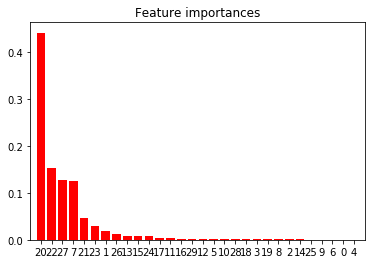

In [12]:
importances = clf4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, bc.feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 課題

アンサンブル学習でbostonデータの回帰を行い、各特徴の重要性を確認してください。